## Importing necessary library



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Reading  `Healthcare insurance data`

In [33]:
insurance = pd.read_csv("insurance.csv")

In [34]:
insurance.sample(2)

,age,sex,bmi,children,smoker,region,charges
353,33,male,35.245,0,no,northeast,12404.87910
34,28,male,36.400,1,yes,southwest,51194.55914


## Overview of data

In [35]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking `NULL` value in our dataset

---



In [36]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Numerical column overview

In [37]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Fatching only Numerical columns value

In [38]:
numerical_cols = insurance.select_dtypes(exclude=['object'])
print(f"{len(numerical_cols.columns)} Numerical column: {', '.join(numerical_cols)}")
numerical_cols.describe().round(2)

4 Numerical column: age, bmi, children, charges


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Fatching Non Numerical column

In [39]:
Categorical_cols = insurance.select_dtypes(include=['object'])
print(f"{len(Categorical_cols.columns)} Non Numerical Column : {', '.join(Categorical_cols)}")
Categorical_cols.describe()

3 Non Numerical Column : sex, smoker, region


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Descriptive Analysis with Data Visualization

In [40]:
import seaborn as sns

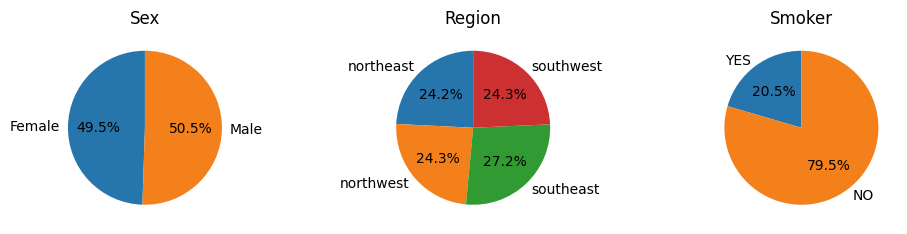

In [41]:
with sns.color_palette("tab10",desat = 0.9):
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 2.5))

# Sex ratio
sizes = [(insurance['sex']== 'female').sum(), (insurance['sex']== 'male').sum()]
ax1.pie(sizes, labels=['Female', 'Male'], autopct = '%1.1f%%',startangle = 90 )
ax1.set_title('Sex')

# region ratio
sizes = [(insurance['region']== 'northeast').sum(), (insurance['region']== 'northwest').sum(),
(insurance['region']== 'southeast').sum(), (insurance['region']== 'southwest').sum()]
labels = ['northeast','northwest', 'southeast','southwest']
ax2.pie(sizes, labels=labels, autopct = '%1.1f%%', startangle = 90)
ax2.set_title('Region')

# Smoker ratio
sizes = [(insurance['smoker']== 'yes').sum(), (insurance['smoker']== 'no').sum()]
ax3.pie(sizes, labels= ['YES','NO'], autopct='%1.1f%%', startangle = 90)
ax3.set_title('Smoker')
plt.show()

## Dataset Overview:

- Total entries: 1,338
- Age range: 18 to 64 years
----
## Gender Distribution:

- Male: ~50%
- Female: ~50%
----
## Regional Distribution:

- Southeast: 27%
- Other regions: Each at 24%
----
## Smoking Habits:

- Smokers to non-smokers ratio: 2:8 (approximated for simplicity)

----

`It is important to note that the mentioned percentages have been rounded for simplicity purposes and may not reflect precise figures.`

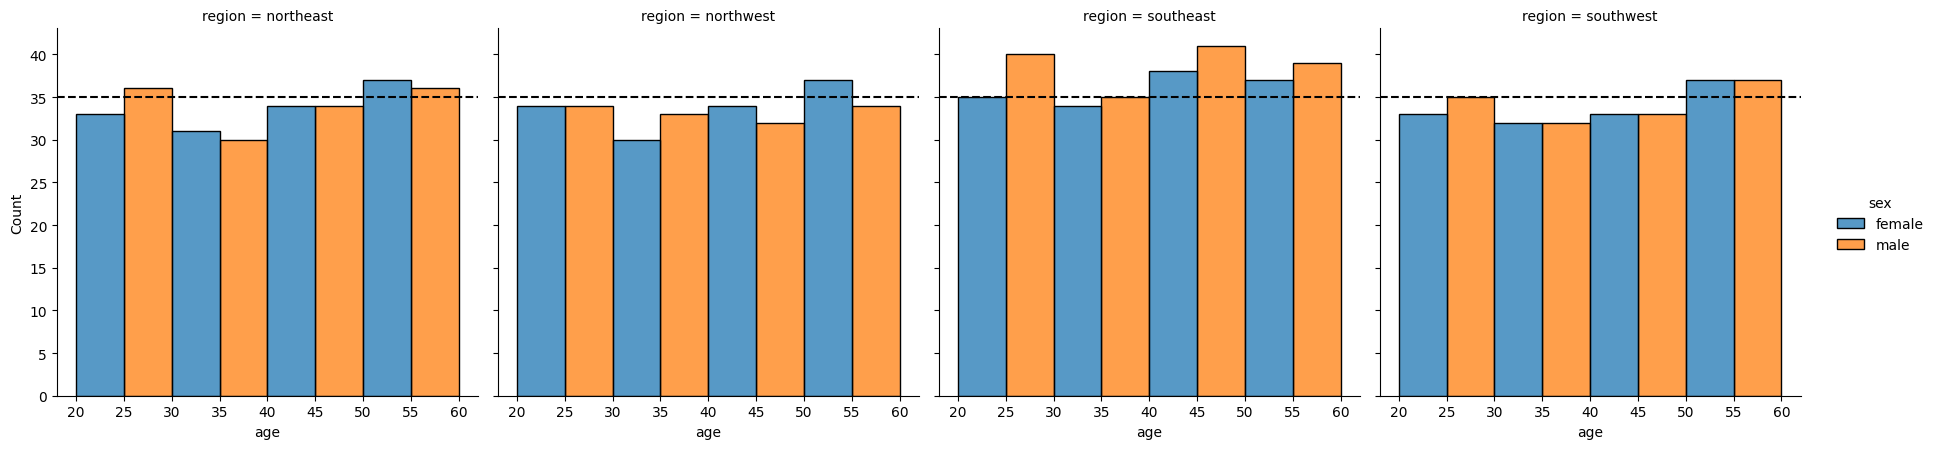

In [42]:
df = sns.displot(insurance, x= 'age', hue = 'sex', col = 'region', col_order = ('northeast','northwest','southeast','southwest'),
height = 4.6, multiple = 'dodge', bins = [20,30,40,50,60])
for i in df.axes.flat:
  i.axhline(y = 35, linestyle = '--', color = 'k')

plt.show()

## Age Distribution by Region:

- Consistent distribution of individuals across various age groups in each region.

## Gender Distribution within Age Groups:

- Relatively similar gender distribution within each age group.

## Dataset Representation:

- Dataset appears to be evenly sampled with balanced age and gender representation across regions.




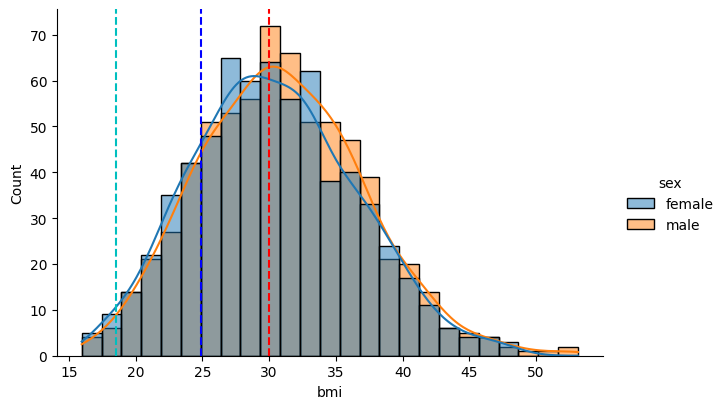

Normal BMI weight: 16.5% , Over weight and Obesity: 81.9%


In [43]:
df = sns.displot(insurance, x= 'bmi', hue= 'sex', kde= True, height= 4.2, aspect= 1.5)
for bm in df.axes.flat:
  bm.axvline(x= 18.5, linestyle= '--', color= 'c')
  bm.axvline(24.9, linestyle= '--', color= 'b')
  bm.axvline(30, linestyle= '--', color= 'r')
plt.show()

bmi_norm = ((insurance['bmi']>18.5) & (insurance['bmi']<24.9)).mean()
bmi_ov = (insurance['bmi']> 24.9).mean()
print(f"Normal BMI weight: {bmi_norm:.1%} , Over weight and Obesity: {bmi_ov:.1%}")

## BMI Categories (as per NIH standards):

- Normal range: BMI between 18.5 and 24.9
- Underweight: BMI below 18.5
- Overweight: BMI between 25.0 and 29.9
- Obesity: BMI of 30.0 or above

##BMI Distribution Analysis:

- Distribution follows a roughly normal pattern.
- Mean BMI value: 30.66
- 16.5% individuals fall within the normal BMI range.
- 81.9% individuals fall into the overweight or obese categories.

## Gender Comparison:

- Average BMI for males is slightly higher than females.
- Higher prevalence of extreme BMI values among males.

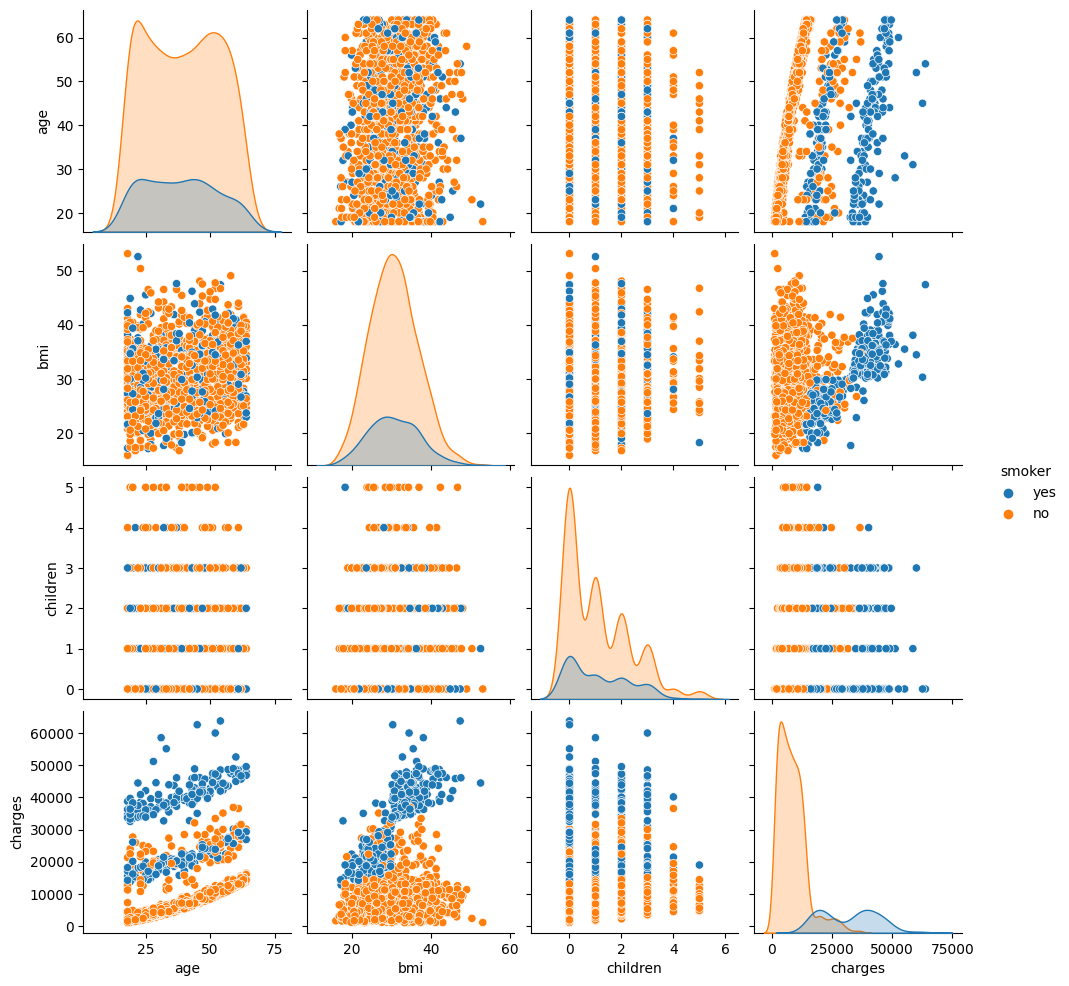

In [44]:
print(sns.pairplot(insurance, hue= 'smoker'))

## Features Potentially Influencing Insurance Costs:

- "Smoker"
- "BMI"
- "Age"

##Objective:
- Validate the influence of each feature on insurance costs.

###Next steps:

- Examine the impact of "smoker" status on insurance costs.
- Analyze the correlation between "BMI" and insurance costs.
- Investigate how "age" affects insurance costs.

# ` 1. Do smokers face elevated insurance expenses?`

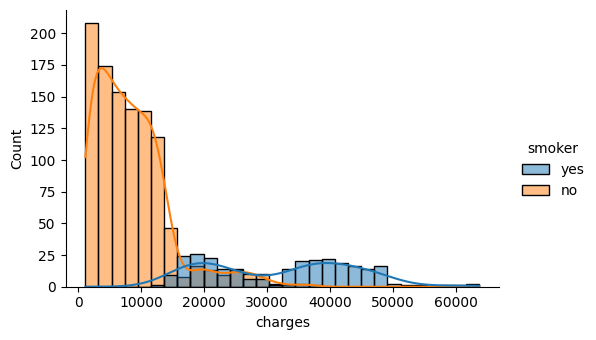

In [45]:
sns.displot(insurance, x= 'charges', hue= 'smoker', kde=True, height= 3.5, aspect= 1.5)
plt.show()

In [46]:
print(f" Smoker Mean Charges: {insurance[insurance['smoker']=='yes']['charges'].mean():.0f} Doller")
print(f" NoN Smoker Mean Charges: {insurance[insurance['smoker']=='no']['charges'].mean():.0f} Doller")

 Smoker Mean Charges: 32050 Doller
 NoN Smoker Mean Charges: 8434 Doller


## Smoking Population Ratio:

- Smokers: 20% of the total population (ratio approximately 2:8).

## Insurance Cost Distribution:

- Positively skewed distribution.
- Majority of individuals have lower premiums.
- Median insurance cost: $9,382.

## Insurance Cost Comparison:

- Non-smokers: Average cost of $8,434; predominantly lower premiums.

- Smokers: Average cost of $32,050; tend to have higher premiums.

## Influence of Smoking on Insurance Costs:

- Significant difference in insurance costs between smokers and non-smokers.
- Smoking status is a primary factor influencing this variation in insurance costs.






# ` 2. Do individuals classified as obese typically face elevated insurance premiums? `

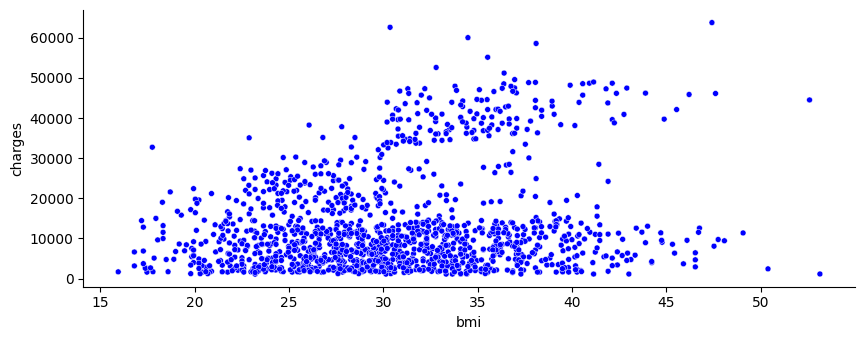

In [47]:
sns.relplot(insurance, x='bmi', y='charges', height=3.5, aspect=2.5, size=1, color='blue', legend=False)
plt.show()

##BMI and Body Condition:

- BMI serves as a standard for assessing body condition.
- Higher BMI values suggest greater obesity.

##BMI Relationship with Insurance Costs:

- Chart analysis indicates BMI is not directly correlated with insurance costs.
- Other influencing factors are likely at play.

## Data Division for Analysis:

- Propose dividing the data into two groups for deeper analysis.

##Consideration of Smoking as a Factor:

- Previous analysis identified smoking as a significant factor affecting insurance premiums.
- Suggest incorporating smoking status into the analysis for a more comprehensive understanding.

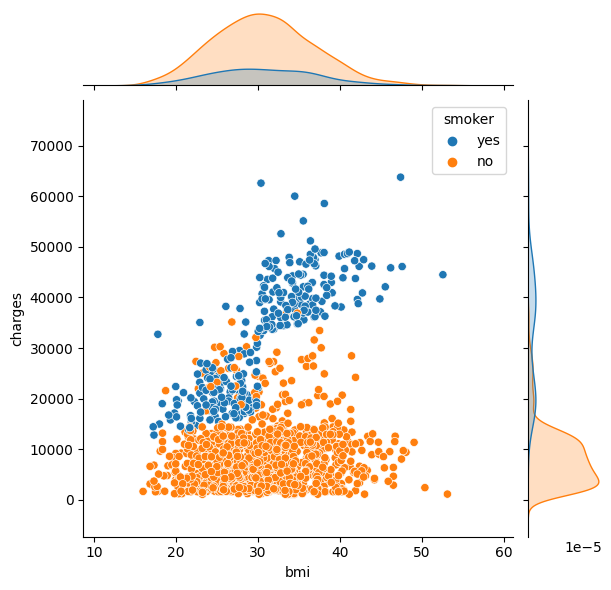

In [48]:
sns.jointplot(insurance, x='bmi',y ='charges', hue= 'smoker', height=6)
plt.show()

##Impact of Smoking on Insurance Costs:

- Smoking significantly affects how much you pay for insurance.

##BMI and Costs for Smokers:

- If you smoke, having a higher BMI (indicating more obesity) means you'll likely pay more for insurance.

##BMI and Costs for Non-Smokers:

- If you don't smoke, just your BMI doesn't have a big impact on how much you pay for insurance.

# `3. Is there a correlation between advancing age and increased insurance premiums?`

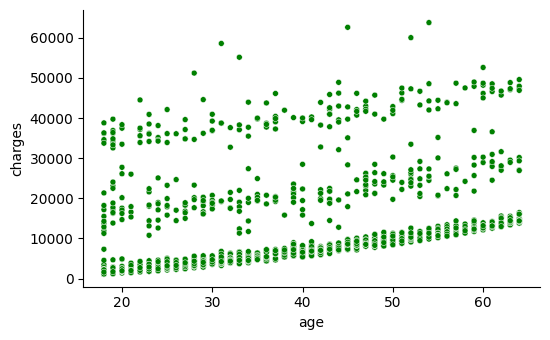

In [49]:
sns.relplot(insurance, x= 'age', y='charges',height=3.5, aspect=1.6, size=1, color='green', legend=False)
plt.show()

##Age and Insurance Premiums:

- Age plays a role in insurance premium variation.
- Higher age often corresponds to higher insurance premiums.

##Factors Influencing Premiums:

- Relationship chart indicates roughly three distinct groups of factors affecting premiums.
- Smoking is identified as a primary factor likely influencing premium differences.

##Hypothesis Verification:

- Propose to verify the hypothesis that smoking is a significant factor impacting insurance premium variations.

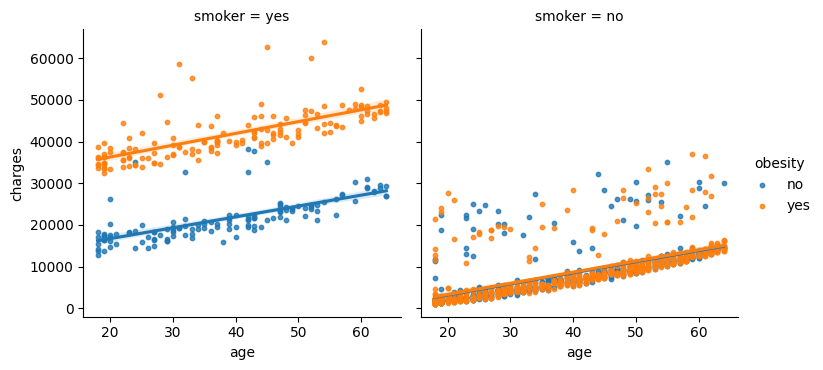

In [50]:
insurance['obesity'] = insurance['bmi'].apply(lambda x: 'no' if x <=30 else 'yes' )
sns.lmplot(insurance, x= 'age', y='charges', col='smoker',hue='obesity', height=3.8, scatter_kws= {'s':10})
plt.show()

In [51]:
print(f"Smoker Obesity Mean Charges:- {insurance[(insurance['smoker']=='yes') & (insurance['bmi']>=30)]['charges'].mean():.0f} Doller")
print(f"Normal Smoker Mean Charges:- {insurance[(insurance['smoker']=='yes') & (insurance['bmi']< 30)]['charges'].mean():.0f} Doller")
print(f" Non Smoker Mean Charges:- {insurance[insurance['smoker']=='no']['charges'].mean():.0f} Doller")

Smoker Obesity Mean Charges:- 41558 Doller
Normal Smoker Mean Charges:- 21363 Doller
 Non Smoker Mean Charges:- 8434 Doller


##Smoking Status as a Grouping Factor:

- The chart affirms smoking status as a significant factor for grouping.

##BMI Value and Insurance Premiums:

- BMI value of 30 or higher (indicating obesity) serves as another criterion influencing insurance premiums.

##Premium Difference Calculation:

- For smokers with a BMI indicating obesity (30+), the premium is approximately 20,195 higher than those with a BMI below this threshold.
- Furthermore, the premium for obese smokers is approximately $33,124 higher compared to non-smokers.

# `4. Among the regions, which one boasts the highest average insurance premium?`

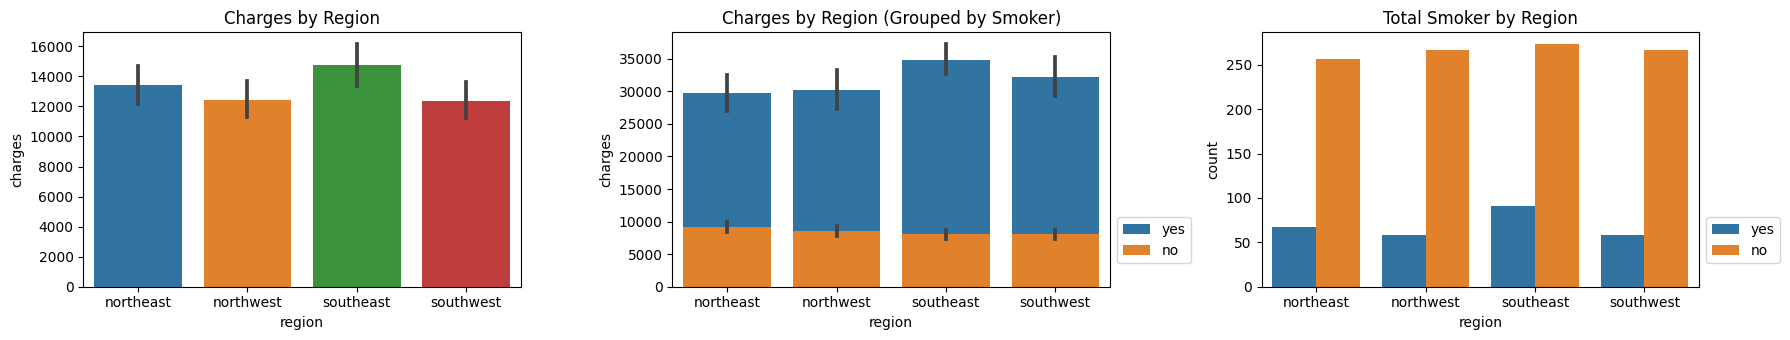

northeast_mean_charges:- 13406 Doller
northwest_mean_charges:- 12418 Doller
southeast_mean_charges:- 14735 Doller
southwest_mean_charges:- 12347 Doller


In [52]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 3.5))

region = ["northeast", "northwest", "southeast", "southwest"]

sns.barplot(data=insurance, x="region", y="charges", order=region, ax=axes[0])
axes[0].set_title("Charges by Region")

sns.barplot(data=insurance, x="region", y="charges", hue="smoker", dodge=False, order=region, ax=axes[1])
axes[1].set_title("Charges by Region (Grouped by Smoker)")
axes[1].legend(loc='best', bbox_to_anchor=(1, 0.3))

sns.countplot(data=insurance, x="region", hue="smoker", order=region, ax=axes[2])
axes[2].set_title("Total Smoker by Region")
axes[2].legend(loc='best', bbox_to_anchor=(1, 0.3))

plt.tight_layout()
plt.show()

for i in reversed(insurance['region'].unique()):
    print(f"{i}_mean_charges:- {insurance[(insurance['region'] == i)]['charges'].mean():.0f} Doller")


##Highest Average Insurance Premiums by Region:

- The Southeastern region of the United States exhibits notably higher average insurance premiums, as observed from the chart.

##Premium Variation Based on Smoking Status:

- Even when considering smoking status, the Southeastern region maintains higher average insurance premiums for smokers.

##Population Statistics and Premium Analysis:

- Despite a slightly larger population of non-smokers in the Southeastern region, their average premiums remain comparatively lower.
- However, it's crucial to note that the Southeastern region has a significantly higher number of smokers compared to the other regions.

##Impact of Smoking Prevalence:

- The higher prevalence of smokers in the Southeastern region significantly contributes to the overall increase in average insurance premiums for this specific region.






# `5. Is there a correlation between the number of insured children and the fluctuation in insurance premiums?`

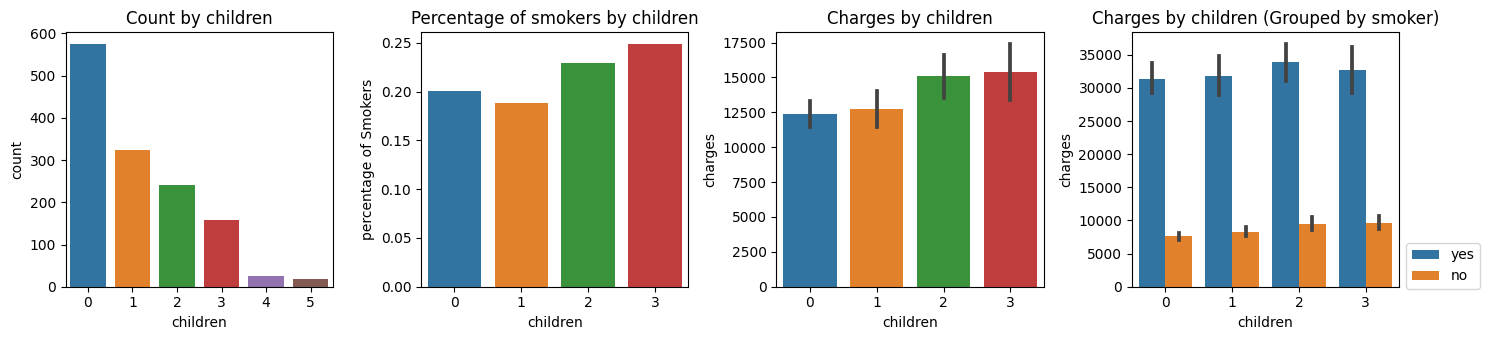

children_0: 574 people, 43% ; perc_smokers: 20%
children_1: 324 people, 24% ; perc_smokers: 19%
children_2: 240 people, 18% ; perc_smokers: 23%
children_3: 157 people, 12% ; perc_smokers: 25%
children_4: 25 people, 2% ; perc_smokers: 12%
children_5: 18 people, 1% ; perc_smokers: 6%


In [53]:
fig, axes = plt.subplots(ncols=4, figsize=(15, 3.5))

# Count by children
sns.countplot(data=insurance, x="children", ax=axes[0])
axes[0].set_title("Count by children")

# Percentage of Smokers by Children
perc_smokers = []
for i in sorted(insurance['children'].unique()):
    num_smokers = insurance[(insurance['smoker'] == 'yes') & (insurance['children'] == i)]['smoker'].count()
    perc = num_smokers / (insurance['children'] == i).sum()
    perc_smokers.append(perc)

df_perc_smokers = pd.DataFrame({
    'children': sorted(insurance['children'].unique()),
    'percentage of Smokers': perc_smokers})

sns.barplot(data=df_perc_smokers[df_perc_smokers['children'] < 4], x='children', y='percentage of Smokers', ax=axes[1])
axes[1].set_title("Percentage of smokers by children")

# Charges by children
sns.barplot(data=insurance[insurance['children'] < 4], x="children", y="charges", ax=axes[2])
axes[2].set_title("Charges by children")

# Charges by children (Grouped by Smoker)
sns.barplot(data=insurance[insurance['children'] < 4], x="children", y="charges", hue="smoker", ax=axes[3])
axes[3].set_title("Charges by children (Grouped by smoker)")
axes[3].legend(loc='best', bbox_to_anchor=(1, 0.2))

plt.tight_layout()
plt.show()

# Print summary
for i in sorted(insurance['children'].unique()):
    num_people = (insurance['children'] == i).sum()
    perc_people = (insurance['children'] == i).mean()
    print(f"children_{i}: {num_people} people, {perc_people:.0%} ; perc_smokers: {perc_smokers[i]:.0%}")

* 43% of the insured individuals in the dataset do not have children.

* The number of individuals with children decreases as the number of children per policyholder increases.

* The analysis excludes individuals with 4-5 children due to a limited sample size.

* Surprisingly, individuals with three children have a 5% higher smoking rate compared to those without children.

* Individuals with 2-3 children have higher average insurance premiums compared to those with 0-1 children.

* Smoking status contributes to higher costs, regardless of the number of children.

# ` Let me Predict the Cost`

In [54]:
# importing prediction library
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
# Feature Engineering
# copying the shadow of our csv data
z_df = insurance.copy()

# replacing  the categorical variable
z_df['sex'].replace({'female': 1, 'male': 0}, inplace=True)
z_df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)
z_df['region']= z_df['region'].map({'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4})

# new feature according to above analysis
z_df['obesity'].replace({'yes': 1, 'no': 0}, inplace=True)
z_df.head().reset_index()

,index,age,sex,bmi,children,smoker,region,charges,obesity
0,0,19,1,27.900,0,1,4,16884.92400,0
1,1,18,0,33.770,1,0,3,1725.55230,1
2,2,28,0,33.000,3,0,3,4449.46200,1
3,3,33,0,22.705,0,0,2,21984.47061,0
4,4,32,0,28.880,0,0,2,3866.85520,0




```
Mod-1 Linear Regression Model
```



In [86]:
# Targeting Features
z_df_x = z_df.drop(['charges','obesity'], axis=1)
z_df_y = z_df.charges
print(f"Shape of z_df_x: {z_df_x.shape}")
print(f"Shape of z_df_y: {z_df_y.shape}\n")

# Normalize the numerical feature
scaler = StandardScaler()
z_df_x_norm = scaler.fit_transform(z_df_x)

# spliting the dataset into training/testing
X_train, X_test, y_train, y_test = train_test_split(z_df_x_norm, z_df_y, test_size=0.2, random_state=1 )

# Building LinearRegression Model
mod_0 = linear_model.LinearRegression()
mod_0.fit(X_train, y_train)
y_pred = mod_0.predict(X_test)

# Evaluate
print(f"Coefficents: {mod_0.coef_}\n")
print(f"Mean_squared_error:- {(mean_squared_error(y_test, y_pred))}")
print(f"Mean_absolute_error:- {(mean_absolute_error(y_test, y_pred)):.0f}")
print(f" R2_score:- {(r2_score(y_test, y_pred)):.0%}")

Shape of z_df_x: (1338, 6)
Shape of z_df_y: (1338,)

Coefficents: [3623.75373254  122.15136578 1920.71689876  496.76520391 9590.99973248
 -365.16798463]

Mean_squared_error:- 35480663.81217908
Mean_absolute_error:- 4056
 R2_score:- 76%


In [85]:
# Traget And Feature
z_df_x = z_df.drop('charges', axis=1)
z_df_y = z_df.charges
print(f" Shape of z_df_x:- {z_df_x.shape}")
print(f" Shape of z_df_y:- {z_df_y.shape}\n")

# Normalizing the numerical features
scaler = StandardScaler()
z_df_norm = scaler.fit_transform(z_df_x)

# spliting DataSet into Training/Testing
X_train, X_test, y_train, y_test = train_test_split(z_df_norm, z_df_y, test_size=0.2, random_state=1)

# Building LinearRegression Model
mod_1 = linear_model.LinearRegression()
mod_1.fit(X_train, y_train)
y_pred = mod_1.predict(X_test)

# Evaluate
print(f" Coefficents:- {mod_1.coef_}\n")
print(f" Mean_squared_error:- {(mean_squared_error(y_test, y_pred))}")
print(f" Mean_absolute_error:- {(mean_absolute_error(y_test, y_pred)):.0f}")
print(f" R2_score:- {r2_score(y_test, y_pred):.0%}")

 Shape of z_df_x:- (1338, 7)
 Shape of z_df_y:- (1338,)

 Coefficents:- [3628.67652259  119.37394454  728.59950526  495.20603552 9606.91952644
 -334.75464713 1496.52991819]

 Mean_squared_error:- 34768426.82046056
 Mean_absolute_error:- 4067
 R2_score:- 77%




```
Mod- 2 Polynomial Regression Model
```



In [83]:
# Targeting Feature
z_df_x = z_df.drop('charges', axis=1)
z_df_y = z_df.charges

# Normalize the numerical feature
scaler = StandardScaler()
z_df_norm = scaler.fit_transform(z_df_x)

# Performing Polynomial feature transformation
poly_feature = PolynomialFeatures(degree=2)
X_poly = poly_feature.fit_transform(z_df_norm)

# split dataset into training/testing data
train_X, test_X, y_train, y_test = train_test_split(X_poly, z_df_y, test_size=0.2, random_state=1)

# Building Linear Regeression Model
mod_2 = linear_model.LinearRegression()
mod_2.fit(X_train, y_train)
y_pred = mod_2.predict(X_test)

# Evaluate
print(f" Coefficents:- {mod_2.coef_}\n")
print(f" Mean_squared_error:- {(mean_squared_error(y_test, y_pred)):.3f}")
print(f" Mean_absolute_error:- {(mean_absolute_error(y_test, y_pred)):.3f}")
print(f" R2_score:- {r2_score(y_test, y_pred):.2%}")

 Coefficents:- [-2.88874559e+11  3.68669513e+03  4.34600555e+13  7.26257128e+02
  8.91441418e+02  1.27166292e+16 -4.48239855e+02 -6.81994722e+14
  7.35052405e+02 -7.98039128e+01  5.83116900e+01  5.70490453e+01
 -3.05255981e+01  2.40799352e+02 -5.05819408e+01 -2.07665611e+15
 -3.97115916e+01  8.06683713e+01 -7.24050198e+01 -4.29530135e+01
  4.17585402e+01 -3.75350473e+01  5.74350324e+01  1.11262978e+03
 -2.19320161e+02 -1.44697000e+02 -1.46037117e+02 -2.53091860e+02
 -1.41013147e+02 -1.31738268e+02 -8.69142550e+15  1.92147162e+02
  3.03292574e+03  5.41163389e+01 -2.25490313e+01 -6.32768616e+15]

 Mean_squared_error:- 17260734.296
 Mean_absolute_error:- 2232.488
 R2_score:- 88.44%


##Introduction of "Obesity" Feature:

- Following the analysis, it was decided to include a new feature called "obesity."

##Model_1: Linear Regression:

- Algorithm: Linear regression
- R2 Score: 76.71%
- Improvement with "Obesity" Feature: 0.48% increase in R2 score

##Model_2: Polynomial Regression (Degree=2):

- Algorithm: Polynomial regression using PolynomialFeatures with degree=2
- R2 Score: 88.44%
- Improvement: 11.73% increase in R2 score compared to the linear regression model